First 2 conversations:  
 1.  u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
 
 2.  u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']

First 2 lines:  
 1.  L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
 
 2.  L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!

The file 'tokenized_sentence_pair.pickle' does not exist in the specified directory.
=====Downloading Existing Data======
 -----TOKENIZED SENTENCE PAIRS-----
tokenized pair -------------------------- 
 (['can', 'we', 'make', 'this', 'quick', '?', 'roxanne', 'korrine', 'and', 'andrew', 'barrett', 'are', 'having', 'an', 'incredibly', 'horrendous', 'public', 'break-', 'up', 'on', 'the', 'quad', '.', 'again', '.', '<EOS>'], ['<SOS>', 'well', ',', 'i', 'thought', 'we', "'d", 'start', 'with', 'pronunciation', ',', 'if', 'that', "'s", 'okay', 'with', 'you', '.']) 
-----------------------------------------
tokenized pair -------------------------- 
 (['well', ',', 'i', 'thought', 'we', "

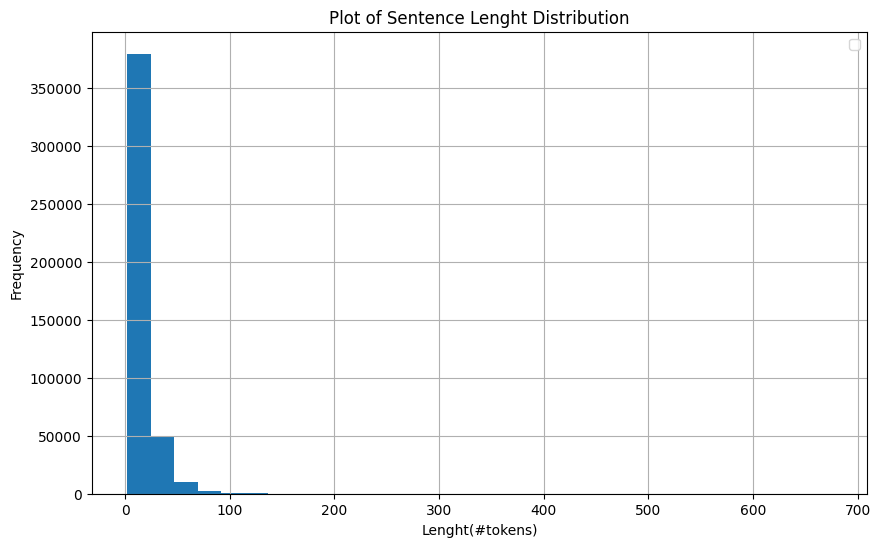

=====Downloading Existing Data======
 -----FILTERED SENTENCE PAIRS-----
len of filtered_pairs:  210152
number of unique sentences: 364139


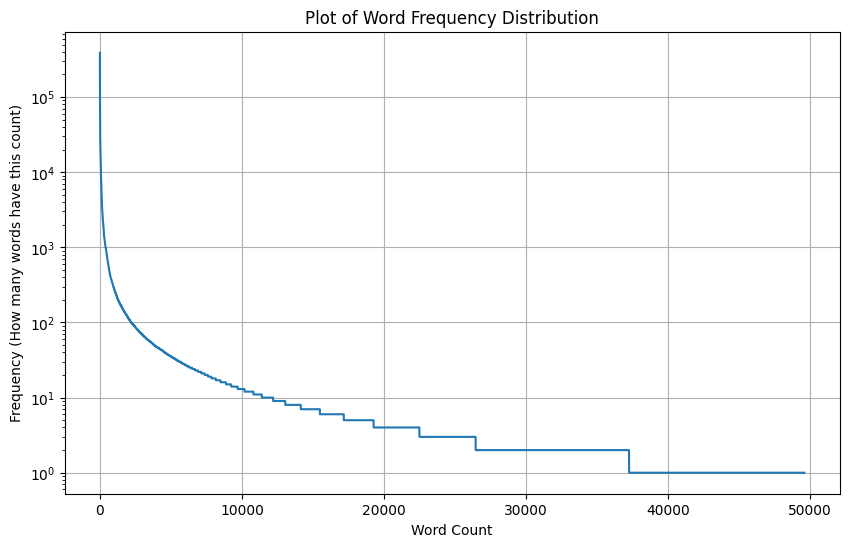

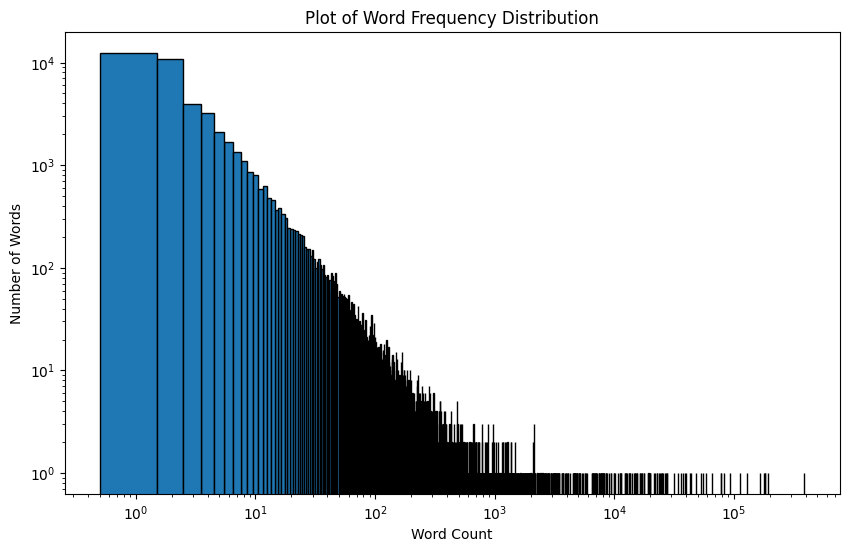

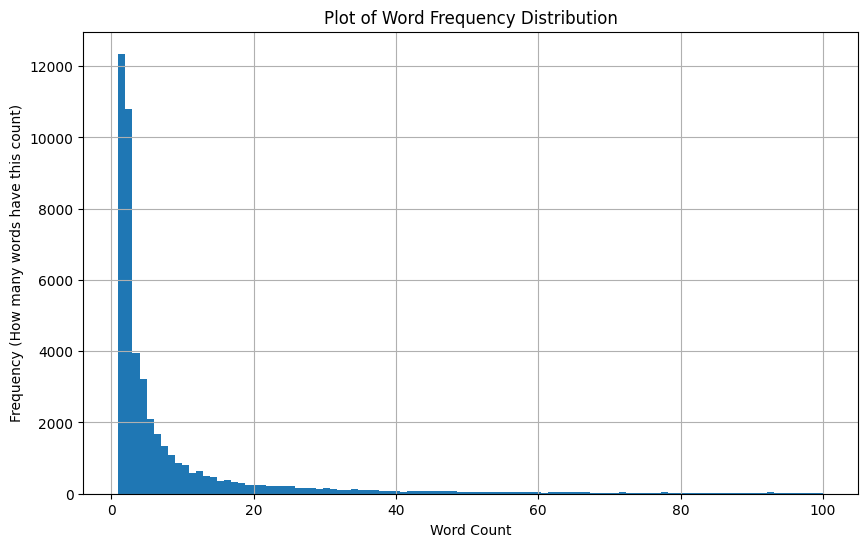

=====Downloading Existing Data======
 -----FILTERED SENTENCES-----
number of pairs:  62657
[(['you', "'re", 'asking', 'me', 'out', '.', 'that', "'s", 'so', 'cute', '.', 'what', "'s", 'your', 'name', 'again', '?', '<EOS>'], ['<SOS>', 'forget', 'it', '.']), (['that', "'s", 'because', 'it', "'s", 'such', 'a', 'nice', 'one', '.', '<EOS>'], ['<SOS>', 'forget', 'french', '.']), (['there', '.', '<EOS>'], ['<SOS>', 'where', '?']), (['you', 'have', 'my', 'word', '.', 'as', 'a', 'gentleman', '<EOS>'], ['<SOS>', 'you', "'re", 'sweet', '.']), (['sure', 'have', '.', '<EOS>'], ['<SOS>', 'i', 'really', ',', 'really', ',', 'really', 'wanna', 'go', ',', 'but', 'i', 'ca', "n't", '.', 'not', 'unless', 'my', 'sister', 'goes', '.']), (['hi', '.', '<EOS>'], ['<SOS>', 'looks', 'like', 'things', 'worked', 'out', 'tonight', ',', 'huh', '?']), (['i', 'was', '?', '<EOS>'], ['<SOS>', 'you', 'never', 'wanted', 'to', 'go', 'out', 'with', "'", 'me', ',', 'did', 'you', '?']), (['well', ',', 'no', '...', '<EOS>'], ['<

KeyboardInterrupt: 

In [6]:
'''
Template for the 4th assignment
Student: NAME SURNAME
'''

############################
# Packages
############################
import torch
import torch.nn as nn
import math
import regex as re
import spacy
from tqdm import tqdm
import pickle
import os
import matplotlib.pyplot as plt 
import unicodedata
import collections
from collections import Counter
import random
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import time

############################
#Methods
###########################

# ________________________________FILE_SYSTEM___________________________________

def exists(directory_path, file_name):
    file_path = os.path.join(directory_path, file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        # Check if the file is not empty
        if os.path.getsize(file_path) > 0:
            # Assuming it's a pickle file, you can add additional checks if needed
            if ((file_name.endswith('.pkl')) or (file_name.endswith('.pickle'))):
                return True
            else:
                print(f"The file '{file_name}' is not a pickle file.")
        else:
            print(f"The file '{file_name}' is empty.")
    else:
        print(f"The file '{file_name}' does not exist in the specified directory.")

    return False

# ________________________________TOKENIZATION___________________________________

def tokenize_with_spacy(sentence_pairs, nlp):
    tokenized_pairs = []

    # Apply custom preprocessing rules
    # Include specific punctuation (?, !, ., ,, -) and alphanumeric characters
    allowed_characters = re.escape("?.!,-'")
    
    
    for question, answer in tqdm(sentence_pairs, desc='Tokenizing'):
        # Process the question and answer sentences
        question = re.sub(r'\s+', ' ', re.sub(rf'[^a-zA-Z0-9{allowed_characters}\s]', '', 
                                       re.sub(r'--+', ' ', question)))

        answer = re.sub(r'\s+', ' ', re.sub(rf'[^a-zA-Z0-9{allowed_characters}\s]', '', 
                                     re.sub(r'--+', ' ', answer)))
        
        question_doc = nlp(question)
        answer_doc = nlp(answer)
        
        # Tokenize and append <EOS> and <SOS>
        tokenized_question = [token.text.lower() for token in question_doc] + ["<EOS>"]
        tokenized_answer = ["<SOS>"] + [token.text.lower() for token in answer_doc] #added .lower()
        
        # Add the tokenized pair to the list
        tokenized_pairs.append((tokenized_question, tokenized_answer))
    
    return tokenized_pairs


def clear_punctuation(s):
     # Lowercase the text
    s = s.lower()

    # Correctly handle hyphenated words: replace hyphens with a placeholder when part of a word
    s = re.sub(r'(?<=\w)-(?=\w)', 'HYPHENPLACEHOLDER', s)

    # Keep contractions intact: look for apostrophes followed by common contraction endings and prevent space insertion
    contraction_patterns = [r"(?<=\w)'(re|ve|ll|t|s|d|m|n't)"]
    for pattern in contraction_patterns:
        s = re.sub(pattern, r'HYPHENAPOSTROPHE\1', s)

    # Separate punctuation (.,!?) from words
    s = re.sub(r'([,.!?])', r' \1 ', s)

    # Remove all non-word characters except apostrophes, placeholders, spaces, and punctuation
    s = re.sub(r'[^\w\sHYPHENPLACEHOLDERHYPHENAPOSTROPHE,.!?]', '', s)

    # Replace placeholders back with their original characters
    s = s.replace('HYPHENPLACEHOLDER', '-')
    s = s.replace('HYPHENAPOSTROPHE', "'")

    # Replace multiple spaces with a single space
    s = re.sub(r'\s+', ' ', s)

    # Trim leading and trailing spaces
    s = s.strip()

    return s

def tokenize_sentence_pairs(sentence_pairs):
    def tokenize(sentence):
        sentence = clear_punctuation(sentence)
        return sentence.strip().split()

    tokenized_pairs = []
    for question, answer in sentence_pairs:
        tokenized_question = tokenize(question) + ["<EOS>"]
        tokenized_answer = ["<SOS>"] + tokenize(answer) + ["<EOS>"]
        tokenized_pairs.append((tokenized_question, tokenized_answer))

    return tokenized_pairs

# ________________________________DOWNLOADs___________________________________

def read_file(file_path):
        encodings = ['utf-8', 'latin-1', 'windows-1252']
        for encoding in encodings:
            try:
                with open(file_path, 'r', encoding=encoding) as file:
                    return file.readlines()
            except UnicodeDecodeError:
                continue
        raise ValueError(f"Error: File {file_path} not readable with utf-8, latin-1, or windows-1252 encodings.")

def print2sentences(conversations_path, lines_path):

    conversations = read_file(conversations_path)
    lines = read_file(lines_path)

    print("First 2 conversations:  \n", "1. ", conversations[0], "\n 2. ", conversations[1])
    print("First 2 lines:  \n", "1. ", lines[0], "\n 2. ", lines[1])


# ________________________________TUPLE-IZATION___________________________________

def create_sentence_pairs(conversations_path, lines_path):

    def get_line_id_to_text(lines):
        line_id_to_text = {}
        for line in lines:
            parts = line.strip().split(' +++$+++ ')
#             if len(parts) == 5: #it may happen to have lines 
#                 line_id, _, _, _, text = parts
            line_id = parts[0] #prendi l'ID
            text = parts[-1] # prendi il testo/line
            line_id_to_text[line_id] = text
        return line_id_to_text

    def generate_pairs(conversations, line_id_to_text):
        pairs = []
        for conversation in conversations:
            line_ids_str = conversation.strip().split(' +++$+++ ')[-1]
            line_ids = eval(line_ids_str)
            conv_texts = [line_id_to_text[line_id] for line_id in line_ids if line_id in line_id_to_text]

            for i in range(len(conv_texts) - 1):
                pairs.append((conv_texts[i], conv_texts[i+1]))
        return pairs

    conversations = read_file(conversations_path)
    lines = read_file(lines_path)

    line_id_to_text = get_line_id_to_text(lines)
    pairs = generate_pairs(conversations, line_id_to_text)

    return pairs

# ________________________________PLOTS___________________________________

def plot_loss(loss, steps, toprint=True, label='', title='Plot of Loss Function', ylabel='loss at given step'):
    if (toprint == True):
        plt.plot(steps, loss, label=label)
        plt.xlabel('steps')
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        return plt.plot(steps, loss, label=label)

def plot_distribution(sentence_lenght,toprint=True, label='', title='Plot of Sentence Lenght Distribution', ylabel='Frequency', xlabel='Lenght(#tokens)'):
    if (toprint == True):
        plt.figure(figsize=(10, 6))
        plt.hist(sentence_lengths, bins=30)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        return plt.hist(sentence_lengths, bins=30)

def plot_word_frequency_distribution(word_counts, toprint=True, label='', title='Plot of Word Frequency Distribution', ylabel='Frequency (How many words have this count)', xlabel='Word Count'):
    frequencies = sorted(word_counts.values(), reverse=True)

    if toprint:
        plt.figure(figsize=(10, 6))
        plt.plot(frequencies, label=label)
        plt.yscale('log')  # Use log scale for better visualization
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        if label:
            plt.legend()
        plt.grid(True)
        plt.show()
    else:
        return plt.plot(frequencies, label=label)
    
def plot_word_frequency_distribution_0100(word_counts, toprint=True, label='', title='Plot of Word Frequency Distribution', ylabel='Frequency (How many words have this count)', xlabel='Word Count', max_word_count=100):
    # Filter the word_counts dictionary to include only words with counts up to max_word_count
    filtered_word_counts = {word: count for word, count in word_counts.items() if count <= max_word_count}

    # Get the frequencies of the filtered word counts
    #frequencies = list(filtered_word_counts.values())
    frequencies = sorted(filtered_word_counts.values(), reverse=True)

    if toprint:
        plt.figure(figsize=(10, 6))
        plt.hist(frequencies, bins=max_word_count) #range=(0, max_word_count)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(True)
        plt.show()
    else:
        return plt.hist(frequencies, bins=max_word_count, range=(0, max_word_count))

    
def plot_word_frequency_distribution_hist2(word_counts, toprint=True, title='Plot of Word Frequency Distribution', ylabel='Number of Words', xlabel='Word Count'):
    # Generate a frequency distribution of word counts
    frequency_distribution = Counter(word_counts.values())
    
    # Prepare the data for plotting
    counts = list(frequency_distribution.keys())
    frequencies = list(frequency_distribution.values())
    
    if toprint:
        plt.figure(figsize=(10, 6))
        plt.bar(counts, frequencies, width=1.0, edgecolor='black')
        plt.yscale('log')  # Log scale for better visibility
        plt.xscale('log')  # Log scale for x-axis to handle wide range of word counts
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        #plt.grid(True, which="both", ls="--")  # Grid for both major and minor ticks
        plt.show()
    else:
        return counts, frequencies

# --------------------------------------TENSOR CREATION-------------------------------------
def collate_fn(batch, pad_value):
    data, targets = zip(*batch)  # batch is split in batch of data and atch of targets batch[0], batch[1] #
    # print("batch 64: ", batch, "\n\n zip(*batch) | DATA: ", data," |TARGETS:", targets)
    padded_data = nn.utils.rnn.pad_sequence(data, batch_first=True,
                                            padding_value=pad_value)
    padded_targets = nn.utils.rnn.pad_sequence(targets, batch_first=True,
                                               padding_value=pad_value)
    # print("batched data: ", padded_data, "\n batched targets: ", padded_targets.size)
    return padded_data, padded_targets


    # both the tensors are padded with the padding corresponding to the maximal value of the lenght of the data

def keys_to_values(sentence, vocabulary, default_if_missing=None):
    return [vocabulary.get(word, default_if_missing) for word in sentence]


# --------------------------------------TRAINING-----------------------------------------
def train(model, dataloader, criterion, optimizer, scheduler=None, epoch=0, clip_grad=0.5, log_interval=5, DEVICE='cpu'):
    
    model.train()  # turn on train mode
    total_loss = 0.
    start_time = time.time()

    num_batches = len(dataloader)
    
    for batch, (question, answer) in enumerate(dataloader):
        
        output = model(question, answer)  

        # Flatten output for loss calculation (documentation)
        output_flat = output.view(-1, model.vocab_size)

        # Compute loss. Ensure targets are reshaped if necessary
        loss = criterion(output_flat, answer.view(-1)) #answers (the criterion wants the tensor reshaped)

        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0] if scheduler else optimizer.param_groups[0]['lr']
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)  # perplexity
            print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}') #lr is truncated
            total_loss = 0
            start_time = time.time()
    
    return average_loss = total_loss / num_batches
            
############################
# Classes
############################
# Vocabulary class
class Vocabulary:
    '''
    Class for dealing with our corpus
    '''

    def __init__(self, name, pairs):
        """
        Args:
            name (str): name of the language
            pairs (list): list of pairs of sentences
        """
        
        self.name = name
        self.pairs = pairs
        self.word2index = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2}
        #self.index2word = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>"}
        #self.n_words = 3  # Count PAD, SOS, EOS
        

        # Initialize vocabulary with pairs
        for pair in pairs:
            for sentence in pair:
                self.add_sentence(sentence)
        
        self.index2word = {index: word for word, index in self.word2index.items()}

    def add_word(self, word):
        '''
        Add a word to the vocabulary
        :param word: a string
        '''
        # TODO: add the word to the vocabulary
       # if word.lower() not in self.word2index and (unicodedata.normalize('NFC', word.lower()) != '<eos>' and unicodedata.normalize('NFC', word.lower()) != '<sos>'):
        if word not in self.word2index:    
            index = len(self.word2index)
            self.word2index[word] = index
            #self.index2word[index] = word
            #self.n_words += 1
#         elif word not in self.word2index and (unicodedata.normalize('NFC', word.lower()) == '<eos>' or unicodedata.normalize('NFC', word.lower()) == '<sos>'):
#             self.word2index[word] = self.n_words
#             self.index2word[self.n_words] = word
#             self.n_words += 1
        #pass

    def add_sentence(self, sentence):
        '''
        Add a sentence to the vocabulary
        :param sentence: list of strings (words)
        '''
        # TODO add the sentence to the vocabulary, this method will call the add_word method
        for word in sentence:
            self.add_word(word)
        #pass
    

# Dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, vocabulary, pairs):
        # TODO We want vocabulary and pairs to be attributes of the class
        self.vocabulary = vocabulary #w to int
        self.pairs = pairs
        self.item_list = []

        for pair in pairs:
            #index = keys_to_values(sequence, vocabulary, None)
            question = keys_to_values(pair[0], self.vocabulary) #remove <EOS>
            answer = keys_to_values(pair[1], self.vocabulary) #remove <EOS> and <SOS>
            q_a = [question, answer]
            self.item_list.append(q_a)
        #pass

    def __len__(self):
        # TODO how many pairs do we have?
        return len(self.item_list)
        #pass

    def __getitem__(self, ix):
        # TODO returns two tensors (question, answer) of the pair at index ix
        # TODO the tensors should be of type torch.tensor and should contain integers (word indices)
        question, answer = self.item_list[ix][0], self.item_list[ix][1]
        return torch.tensor(question, dtype=torch.long), torch.tensor(answer, dtype=torch.long)
        #pass
    
    

class PositionalEncoding(nn.Module):
    '''
    Adapted from
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    '''
    def __init__(self, d_model, dropout=0.0, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.max_len = max_len

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float()
                             * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        try:
            assert x.size(0) < self.max_len
        except:
            print("The length of the sequence is bigger than the max_len of the positional encoding. Increase the max_len or provide a shorter sequence.")
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):
    
#     from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

#     config = TimeSeriesTransformerConfig(
#     prediction_length=prediction_length,
#     context_length=prediction_length*2,
#     lags_sequence=lags_sequence,
#     num_time_features= 2, # month of year + "age"
#     num_static_categorical_features=1,
#     cardinality=[len(train_dataset)],
#     embedding_dimension=[2],

#     # transformer params:
#     encoder_layers=4, # N_x
#     decoder_layers=4, # N_x
#     d_model=32,

    # NOTE: Other hyperparams could be tuned here like encoder_attention_heads, decoder_attention_heads, dropout, FF dimension, etc...
# )

# model = TimeSeriesTransformerForPrediction(config)
    
    def __init__(self, vocab_size, d_model=512, pad_id=0, encoder_layers=6, decoder_layers=6, dim_feedforward=2048, num_heads=8, dropout_p=0.1):
        
        super().__init__()
        self.model_type = 'Transformer'
        
        # Stuff you may need
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.pad_id = pad_id
        self.encoder_layers = encoder_layers
        self.decoder_layers= decoder_layers
        self.dim_feedforward = dim_feedforward
        self.num_heads = num_heads
        self.dropout_p=dropout_p
        
        
        # TODO add an embedding layer
        self.embedding = nn.Embedding(self.vocab_size, self.d_model, padding_idx=self.pad_id)
        
        # TODO add a positional encoding layer
        self.pos_encoder = PositionalEncoding(self.d_model, self.dropout_p) #max_len?
        
        # TODO add a transformer layer, you can use nn.Transformer. You can use the default values for the parameters, but what about batch_first?
        self.transformer = nn.Transformer(d_model=self.d_model, 
                                  nhead=self.num_heads, 
                                  num_encoder_layers=self.encoder_layers, 
                                  num_decoder_layers=self.decoder_layers, 
                                  dim_feedforward=self.dim_feedforward, 
                                  dropout=self.dropout_p,
                                  batch_first=True)  # batch_first to True = batch s 1st dimension 
        #other param.: activation=<function relu>, custom_encoder=None, custom_decoder=None, layer_norm_eps=1e-05, norm_first=False, bias=True, device=None, dtype=None)
        
        # TODO add a linear layer. Note: output should be probability distribution over the vocabulary
        self.linear = nn.Linear(self.d_model, self.vocab_size)
        
        #added
        self.init_weights()


    def create_padding_mask(self, x, pad_id=0):
        # TODO create a boolean mask for the <PAD> tokens
        mask = x == pad_id #mask is the new boolean tensor
        return mask 

    
    #added
    def init_weights(self) -> None:
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.linear.bias.data.zero_()
        self.linear.weight.data.uniform_(-initrange, initrange)


    def forward(self, src, tgt):
        # S is the source sequence length, T is the target sequence length, N is the batch size, E is the feature number
        # src: (N, S)
        # tgt: (N, T)
        # src_pad_mask: (N, S)
        # tgt_pad_mask: (N, T)
        # mask the future : (N * num_heads, T, T)

        src_pad_mask = self.create_padding_mask(src, self.pad_id) # (N, S)
        tgt_pad_mask = self.create_padding_mask(tgt, self.pad_id) # (N, T)

        src = self.embedding(src)
        tgt = self.embedding(tgt)

        src = self.pos_encoder(src)  # (N, S, E)
        tgt = self.pos_encoder(tgt) # (N, T, E)

        # Mask the memory
        memory_key_padding_mask = src_pad_mask  # (N, S)

        # Mask the future
        #tgt_mask = self.transformer.generate_square_subsequent_mask(tgt.size(1), dtype=torch.bool).to(tgt.device) # (T, T)
        tgt_mask = self.transformer.generate_square_subsequent_mask(tgt.size(1)).to(tgt.device) # (T, T)
        tgt_mask = tgt_mask.bool() #for Kaggle pytorch version 
        # Expand to make it N * num_heads, T, T
        tgt_mask = tgt_mask.unsqueeze(0).repeat(tgt.size(0) * self.num_heads, 1, 1) # (N, T, T)
        # Transformer
        output = self.transformer(src, tgt, tgt_mask=tgt_mask, src_key_padding_mask=src_pad_mask,
                                  tgt_key_padding_mask=tgt_pad_mask, memory_key_padding_mask=memory_key_padding_mask) # (N, T, E)
        # Linear layer
        output = self.linear(output) # (N, T, V)
        return output


###########################
# Main
###########################

if __name__ == "__main__":
    # !!! Don't change the seed !!!
    torch.manual_seed(42)
    # !!!!!!
    
    # Download the data---------------------------------------------------------
    conversations_path = '/kaggle/input/conversations/movie_conversations.txt'
    lines_path = '/kaggle/input/conversations/movie_lines.txt'
    print2sentences(conversations_path, lines_path)
    
    # Create the pairs----------------------------------------------------------
    sentence_pairs = create_sentence_pairs(conversations_path, lines_path)
    #for pair in sentence_pairs[:5]:
        # print(pair)
    
    # Tokenize the data---------------------------------------------------------
    #if ((exists("/kaggle/working/", "tokenized_sentence_pairs.pickle") == False)): #or (==False)
    if ((exists("/kaggle/working/", "tokenized_sentence_pair.pickle") == True)):
    
        
        #tokenized_sentence_pairs = tokenize_sentence_pairs(sentence_pairs)
        nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer"])
        print("[en_core_web_sm] model downloaded! \n")
        tokenized_sentence_pairs = tokenize_with_spacy(sentence_pairs, nlp) 
        
        for pair in tokenized_sentence_pairs[:5]:
            print("tokenized pair -------------------------- \n", pair, "\n-----------------------------------------")
        
        print("creating and saving 'tokenized_sentence_pairs.pickle' ... ")
        with open('/kaggle/working/tokenized_sentence_pairs.pickle', 'wb') as handle:
            pickle.dump(tokenized_sentence_pairs, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
    else:
        print("=====Downloading Existing Data======\n -----TOKENIZED SENTENCE PAIRS-----")

#         with open('/kaggle/working/tokenized_sentence_pairs.pickle', 'rb') as handle:
#             tokenized_sentence_pairs = pickle.load(handle)
        with open( '/kaggle/input/tokenized-low/tokenized_sentence_pairs.pickle', 'rb') as handle:
            tokenized_sentence_pairs = pickle.load(handle)
            
            
        
        for pair in tokenized_sentence_pairs[:5]:
            print("tokenized pair -------------------------- \n", pair, "\n-----------------------------------------")
    
    #Filter Sentences-----------------------------------------------------------
    
    #Plot Distribution
    print("number of tuples in tokenized_sentences:", len(tokenized_sentence_pairs) )
    all_sentences = [sentence for pair in tokenized_sentence_pairs for sentence in pair]
    sentence_lengths = [len(sentence) for sentence in all_sentences]
    plot_distribution(sentence_lengths, toprint=True)
    max_length= 50 #look at the graph
    
    # Filter out the sentences that are too long
    if ((exists("/kaggle/working/", "filtered_pairs.pickle") == False)): #or (==False)
        filtered_pairs = []
        for pair in tokenized_sentence_pairs:
            if all(len(sentence) <= max_length for sentence in pair):
                filtered_pairs.append(pair)
        print("creating and saving 'filtered_pairs.pickle' ... ")
        with open('/kaggle/working/filtered_pairs.pickle', 'wb') as handle:
            pickle.dump(filtered_pairs, handle, protocol=pickle.HIGHEST_PROTOCOL)
    else:
        print("=====Downloading Existing Data======\n -----FILTERED SENTENCE PAIRS-----")

        with open('/kaggle/working/filtered_pairs.pickle', 'rb') as handle:
            filtered_pairs = pickle.load(handle)
           
        
    
    # Filter out the words that are too rare
    
    #counting frequency of words in unique sentences
    word_counts = collections.Counter()
    seen_sentences = set()
    print("len of filtered_pairs: ", len(filtered_pairs))
    sentence_counter= 0
    for pair in filtered_pairs:
        for sentence in pair:
            sentence_str = ' '.join(sentence)  # Convert list of words to a string sentence
            if sentence_str not in seen_sentences:
                seen_sentences.add(sentence_str)
                sentence_counter+=1
                #for word in sentence:
                word_counts.update(sentence)
    #print(word_counts)
    print("number of unique sentences:", sentence_counter)
    
    #plot
    plot_word_frequency_distribution(word_counts)
    plot_word_frequency_distribution_hist2(word_counts)
    plot_word_frequency_distribution_0100(word_counts)
    
    #eleting sentences which have at least a non-frequent word
    min_freq = 100
    common_words = []
    if ((exists("/kaggle/working/", "filtered_sentences.pickle") == False)):
        for word, count in word_counts.items():
            if count >= min_freq:
                common_words.append(word)

        filtered_sentences=[]

        for pair in tqdm(filtered_pairs, desc='Filtering Sentences'):
            all_words_common = True  # Assume all words are common initially
            for sentence in pair:
                for word in sentence:
                    if word not in common_words:
                        all_words_common = False
                        break  
                if not all_words_common:
                    break  


            if all_words_common:
                filtered_sentences.append(pair)
                
        print("creating and saving 'filtered_sentences.pickle' ... ")
        with open('/kaggle/working/filtered_sentences.pickle', 'wb') as handle:
            pickle.dump(filtered_sentences, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("len of common_words: ", len(common_words))
        print("COMMON WORDS: ", common_words[:10])
    else:
        print("=====Downloading Existing Data======\n -----FILTERED SENTENCES-----")
        with open('/kaggle/working/filtered_sentences.pickle', 'rb') as handle:
            filtered_sentences = pickle.load(handle)    
    
    
    print("number of pairs: ", len(filtered_sentences))
    print(filtered_sentences[:10])
    
    #sample 10.000 sequences
    random.seed(42)
    subset_size = min(10000, len(filtered_sentences))
    sampled_subset = random.sample(filtered_sentences, subset_size)
    print(sampled_subset[:10])
    
    vocab = Vocabulary("English", sampled_subset)
    print(list(vocab.word2index.items())[:10])
    print(list(vocab.index2word.items())[:10])
    print("len of w2indx: ", len(vocab.word2index), "\n len of indx2w: ", len(vocab.index2word))
    

    
#     #create vocabulary (without EOS and SOS)-----------------------------
#         if ((exists("/kaggle/working/", "all_words.pickle") == False)):
#             all_words = set([])  # Use a set for efficiency 
        
#             for pair in tqdm(pairs, desc='Creating Word Dictionary'):
#                 for sentence in pair:
#                     for word in sentence:
#                         lower_word = word.lower()
#                         #if lower_word not in word_recurrence:
#                         #if lower_word not in ['<eos>', '<sos>']:
#                         if unicodedata.normalize('NFC', word.lower()) != '<eos>' and unicodedata.normalize('NFC', word.lower()) != '<sos>':
#                             #word_recurrence.append(lower_word)
#                             all_words.add(lower_word)  # Add to set, duplicates will be ignored

#             all_words = list(all_words)
#             #all_words = ['<EOS>', '<SOS>'] + all_words + ['PAD']
#             #all_words.add("PAD")

#             #print(len(all_words))

#             print("creating and saving 'all_words.pickle' ... ")
#             with open('/kaggle/working/all_words.pickle', 'wb') as handle:
#                 pickle.dump(all_words, handle, protocol=pickle.HIGHEST_PROTOCOL)
#         else:
#             print("=====Downloading Existing Data======\n -----ALL WORDS-----")

#             with open('/kaggle/working/all_words.pickle', 'rb') as handle:
#                 all_words = pickle.load(handle)
#         #--------------------------------------------------------------------------
    
    dataset = Dataset(vocab.word2index, sampled_subset)
    print(dataset.__getitem__(2))
    #print(dataset.__getitem__(2)[0])
    #print(dataset.__getitem__(2)[1])
    print([vocab.index2word.get(item) for item in dataset.__getitem__(2)[0]])  # why except the first one??
    print([vocab.index2word.get(item) for item in dataset.__getitem__(2)[1]])
    #print(word_to_int["PAD"])

    # COLLATE
    batch_size = 64  # 8
    if batch_size == 1:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    else:
        dataloader = DataLoader(dataset, batch_size=batch_size,collate_fn=lambda b: collate_fn(b, vocab.word2index["<PAD>"]),shuffle=True)  # by calling collate like this, the dataloader
#         # will automatically pad the sequence for us
#         # only in the batch, instead of padding all the
#         # dataset w/ a fixed lenght
#     for i in dataloader:
#         print(i)

#Training-----------------------------------------------------------
    
    #device
    DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    
    # Define your model
    model = TransformerModel(vocab_size=len(vocab.word2index), 
                             d_model=512, 
                             pad_id=vocab.word2index["<PAD>"], 
                             encoder_layers=6, 
                             decoder_layers=6, 
                             dim_feedforward=2048, 
                             num_heads=8, 
                             dropout_p=0.1)

    # Define your loss criterion - for example, CrossEntropyLoss for classification tasks
    criterion = nn.CrossEntropyLoss()

    # Define your optimizer - for example, Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Optional: Define a learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)

    # Assuming 'dataset' is your Dataset object and 'batch_size' is defined
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda b: collate_fn(b, vocab.word2index["<PAD>"]))

    # Define the number of epochs for training
    num_epochs = 5
    train_ga_loss = []

    # Training loop
    for epoch in range(num_epochs):
        print(f'Starting epoch {epoch+1}/{num_epochs}')
        epoch_loss = train(model, dataloader, criterion, optimizer, scheduler, epoch, DEVICE=DEVICE)
        train_ga_loss.append(epoch_loss)

        # Update the learning rate
        if scheduler:
            scheduler.step()
    
    plot_loss(train_ga_loss,  np.arange(0,num_epoch1,1), True, label='Loss Function', title='Plot of the Loss Function')
    
     #print(all_words[:300])
    
    #print("\n \n \n last element of all_words: ", all_words[-1] )

    # SAVE and put the code above into a function that you will call if you need to generate something slightly different

    # Training loop (Consider writing a function for this/two separate functions for training and validation)

    # Evaluation by feeding the model with one input sentence at a time

    pass